In [1]:
import numpy as np
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
os.chdir ('C:/Users/Sushant/Documents/newspaper-word-count/Udemy Codes')
%pwd()

'C:\\Users\\Sushant\\Documents\\newspaper-word-count\\Udemy Codes'

In [3]:
df = pd.read_csv ('real_estate_price_size_year_view.csv')
df.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [4]:
#Create a correlation matriz and print it
mat = df.corr()
mat

,price,size,year
price,1.000000,0.862983,0.093014
size,0.862983,1.000000,-0.097678
year,0.093014,-0.097678,1.000000


,price,size,year
price,1,0.862983,0.0930141
size,0.862983,1,-0.0976781
year,0.0930141,-0.0976781,1


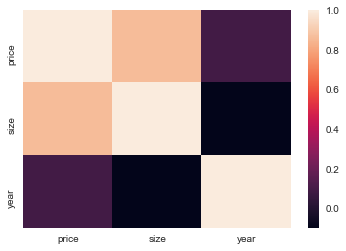

In [5]:
##Make a correlation plot
sns.heatmap(mat, xticklabels=mat.columns.values,
            yticklabels=mat.columns.values)

##Make another kind of correlation plot 
mat.style.background_gradient()

In [6]:
# change the categorical variables to factor
df['view']= df['view'].map({'No sea view': 0, 'Sea view':1})
df.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [7]:
#Make the dataframe of response and explanatory variable
Y = df ['price']
X1 = df.drop(columns=['price'])
X1.head()

,size,year,view
0,643.09,2015,0
1,656.22,2009,0
2,487.29,2018,1
3,1504.75,2015,0
4,1275.46,2009,1


In [8]:
#Add constant to the explanatory variable
X = sm.add_constant(X1)
X.head()

,const,size,year,view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1


In [9]:
#Run the regression
reg = sm.OLS(Y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           1.02e-50
Time:                        20:30:02   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

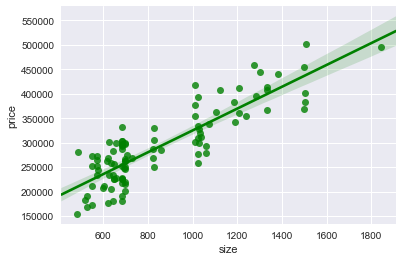

In [10]:
#Plot the data and color by categorical variable
sns.regplot(X['size'],Y, color='green' )
plt.show()